#  Overview

#### The New York Taxi Fare Prediction dataset is used for predicting the fare amount for taxi trips in New York City The dataset includes information such as the pickup and dropoff locations, pickup_date_time, passenger count, and the actual fare amount. The goal is to predict the fare amount based on these input features. We have used the Linear Regression using Polynomial Feature, Random Forest Regressor, Decision Tree Regressor, Bagging Regressor, Gradient Boosting Regressor and Ada Boost Regressor. The Gradient Boosting Regressor yeilded the best accuracy and precision score
 

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


## EDA

In [6]:
df.drop(['unique_id'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'],format='%Y-%m-%d %H:%M:%S UTC')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   amount                50000 non-null  float64       
 1   date_time_of_pickup   50000 non-null  datetime64[ns]
 2   longitude_of_pickup   50000 non-null  float64       
 3   latitude_of_pickup    50000 non-null  float64       
 4   longitude_of_dropoff  50000 non-null  float64       
 5   latitude_of_dropoff   50000 non-null  float64       
 6   no_of_passenger       50000 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.7 MB


In [11]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [12]:
df = df.loc[df['latitude_of_pickup'].between(40,42)]
df = df.loc[df['longitude_of_pickup'].between(-75,-72)]
df = df.loc[df['latitude_of_dropoff'].between(40,42)]
df = df.loc[df['longitude_of_dropoff'].between(-75,-72)]
df = df.loc[df['amount'] > 2.5]
df = df.loc[df['no_of_passenger'] > 0]

In [13]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,48613.000000,48613.000000,48613.000000,48613.000000,48613.000000,48613.000000
mean,11.397615,-73.975240,40.751138,-73.974080,40.751603,1.676136
std,9.663531,0.039365,0.030687,0.038430,0.033550,1.289744
min,2.900000,-74.711648,40.121653,-74.755480,40.164927,1.000000
25%,6.000000,-73.992315,40.736528,-73.991333,40.735934,1.000000
50%,8.500000,-73.982130,40.753450,-73.980498,40.754125,1.000000
75%,12.500000,-73.968428,40.767792,-73.965397,40.768485,2.000000
max,200.000000,-72.856968,41.650000,-72.854940,41.543217,6.000000


In [14]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

## Data Visualization

(0.0, 100.0)

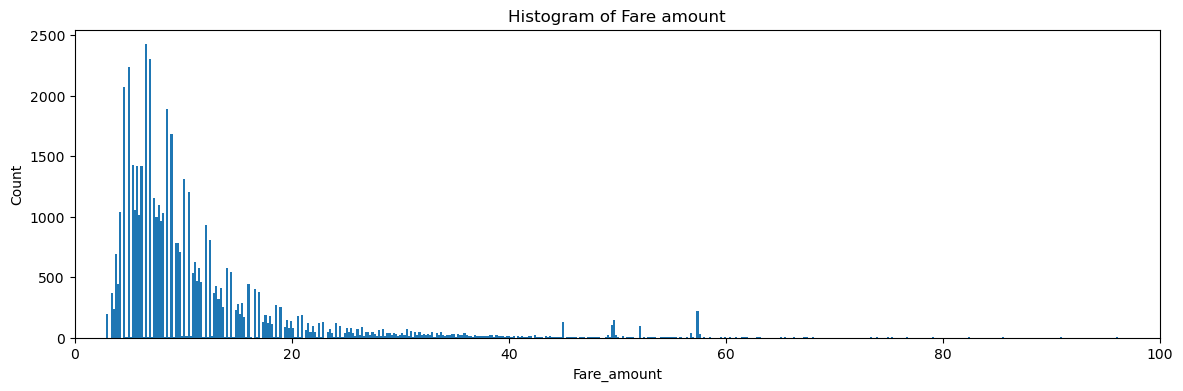

In [15]:
plt.figure(figsize=(14,4))
plt.hist(df['amount'],1000)
plt.xlabel('Fare_amount')
plt.ylabel('Count')
plt.title('Histogram of Fare amount')
plt.xlim(0,100)

In [16]:
df['no_of_passenger'].value_counts()

1    33890
2     7241
5     3374
3     2142
4      991
6      975
Name: no_of_passenger, dtype: int64

Text(0, 0.5, 'Frequency')

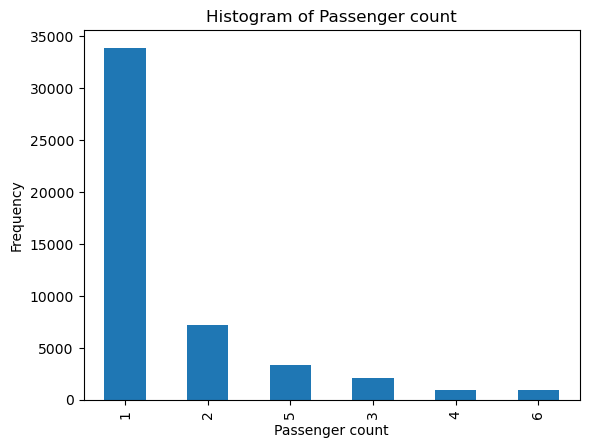

In [17]:
df['no_of_passenger'].value_counts().plot.bar()
plt.title('Histogram of Passenger count')
plt.xlabel('Passenger count')
plt.ylabel('Frequency')

In [18]:
df['year'] = df.date_time_of_pickup.dt.year
df['month'] = df.date_time_of_pickup.dt.month
df['day'] = df.date_time_of_pickup.dt.day
df['weekday'] = df.date_time_of_pickup.dt.weekday
df['hour'] = df.date_time_of_pickup.dt.hour

In [19]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


### To calculate Spherical distance we use Haversine Formula

In [20]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [21]:
df['distance'] = haversine_np(df['longitude_of_pickup'],df['latitude_of_pickup'],df['longitude_of_dropoff'],df['latitude_of_dropoff'])

In [22]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030117
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.444828
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.797513
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.997902


<Figure size 1400x400 with 0 Axes>

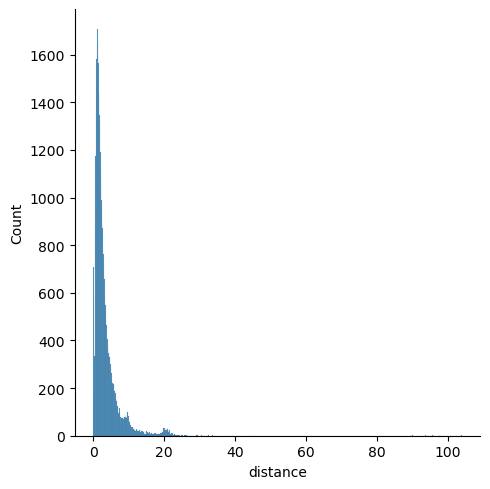

In [23]:
plt.figure(figsize=(14,4))
sns.displot(df['distance'], bins=1000, kde=False)

In [24]:
df['distance'].describe()

count    48613.000000
mean         3.363251
std          3.902667
min          0.000000
25%          1.268767
50%          2.165309
75%          3.944734
max        103.969647
Name: distance, dtype: float64

In [25]:
df = df.loc[df['distance']>0]

In [26]:
df['distance'].describe()

count    48125.000000
mean         3.397356
std          3.907607
min          0.000084
25%          1.292138
50%          2.189420
75%          3.975369
max        103.969647
Name: distance, dtype: float64

In [27]:
del df['date_time_of_pickup']

In [28]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,weekday,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030117
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.444828
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.797513
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.997902


### Seperating independant and dependant variable

In [29]:
X = df.drop('amount',axis=1)
y = df['amount']

## Spliting Data into Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

## Linear Model Building

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr_model = LinearRegression()

In [34]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [35]:
lr_model.score(X_train,y_train)

0.6545399148508847

In [36]:
lr_model.score(X_test,y_test)

0.7205157503867936

### Since score of Linear Model is Underfit hence to improve the score we have applied the Polynomial Features

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
# Fit a linear regression model
poly = PolynomialFeatures(degree=3,interaction_only=True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

lr_model.fit(X_train2, y_train)

LinearRegression()

In [39]:
lr_model.score(X_train2, y_train)

0.8107271868840423

In [40]:
lr_model.score(X_test2, y_test)

0.7842200881501338

In [41]:
y_pred = lr_model.predict(X_test2)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
from math import sqrt

rms = sqrt(mean_squared_error(y_test,y_pred))
rms

4.367771121571306

## Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf_model = RandomForestRegressor(max_depth=3,random_state=0,n_estimators=100)

In [46]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [47]:
rf_model.score(X_train,y_train)

0.7733162455525903

In [48]:
rf_model.score(X_test,y_test)

0.7721717353791102

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

4.488054974004672

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt_model = DecisionTreeRegressor(max_depth=2)

In [53]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [54]:
dt_model.score(X_train,y_train)

0.7031077663323185

In [55]:
dt_model.score(X_test,y_test)

0.7300230884292962

In [56]:
y_pred = dt_model.predict(X_test)

In [57]:
y_pred

array([28.11121008,  7.53630581, 14.44528187, ...,  7.53630581,
        7.53630581,  7.53630581])

In [58]:
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

4.8855974387416214

## Bagging Regressor

In [59]:
from sklearn.ensemble import BaggingRegressor

In [60]:
# Create a base estimator
base_estimator = RandomForestRegressor(max_depth=5)

In [61]:
# Create a bagging regressor and fit it to the training set
bagging = BaggingRegressor(base_estimator=base_estimator,n_estimators=10,random_state=0)

In [62]:
bagging.fit(X_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                 random_state=0)

In [63]:
bagging.score(X_train,y_train)

0.8408685874078755

In [64]:
bagging.score(X_test,y_test)

0.8178703401176537

In [65]:
y_pred = bagging.predict(X_test)

In [66]:
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

4.012774039376774

## Boosting

### GradientBoosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
# Create a boosting regressor and fit it to the training set
gbr = GradientBoostingRegressor()

In [69]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [70]:
gbr.score(X_train,y_train)

0.8790566443479795

In [71]:
gbr.score(X_test,y_test)

0.8393056243041785

In [72]:
y_pred = gbr.predict(X_test)

In [73]:
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

3.7692479320304675

### AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [82]:
# Create a decision tree regressor as the base estimator
base_estimator = RandomForestRegressor(max_depth=5)

In [87]:
adaboost = AdaBoostRegressor(base_estimator=base_estimator,n_estimators=5,random_state=0)

In [88]:
adaboost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=5, random_state=0)

In [89]:
adaboost.score(X_train,y_train)

0.8389889976119397

In [90]:
adaboost.score(X_test,y_test)

0.7875970189778633

In [91]:
y_pred = adaboost.predict(X_test)

In [92]:
rms = sqrt(mean_squared_error(y_test,y_pred))
rms

4.333458788066009